In [ ]:
import numpy as np
import pandas as pd
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train , test])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

                                             |          | [  0%]   00:00 -> (? left)


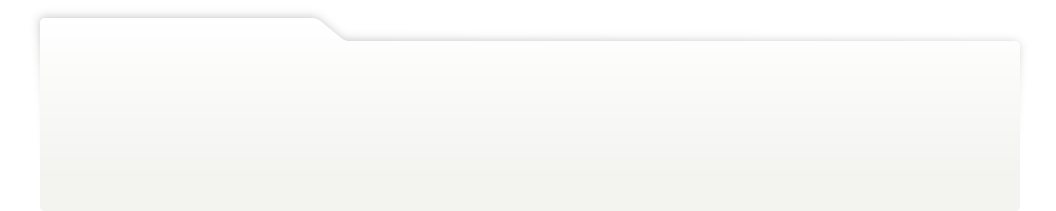
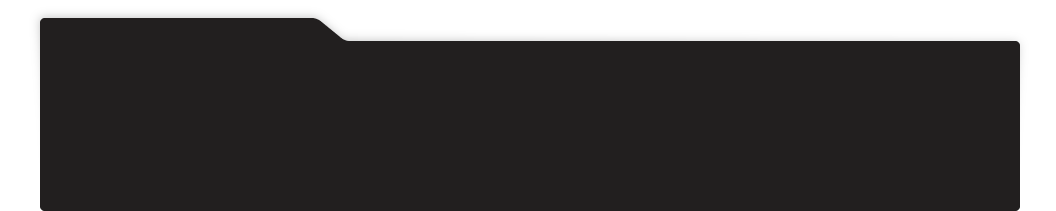
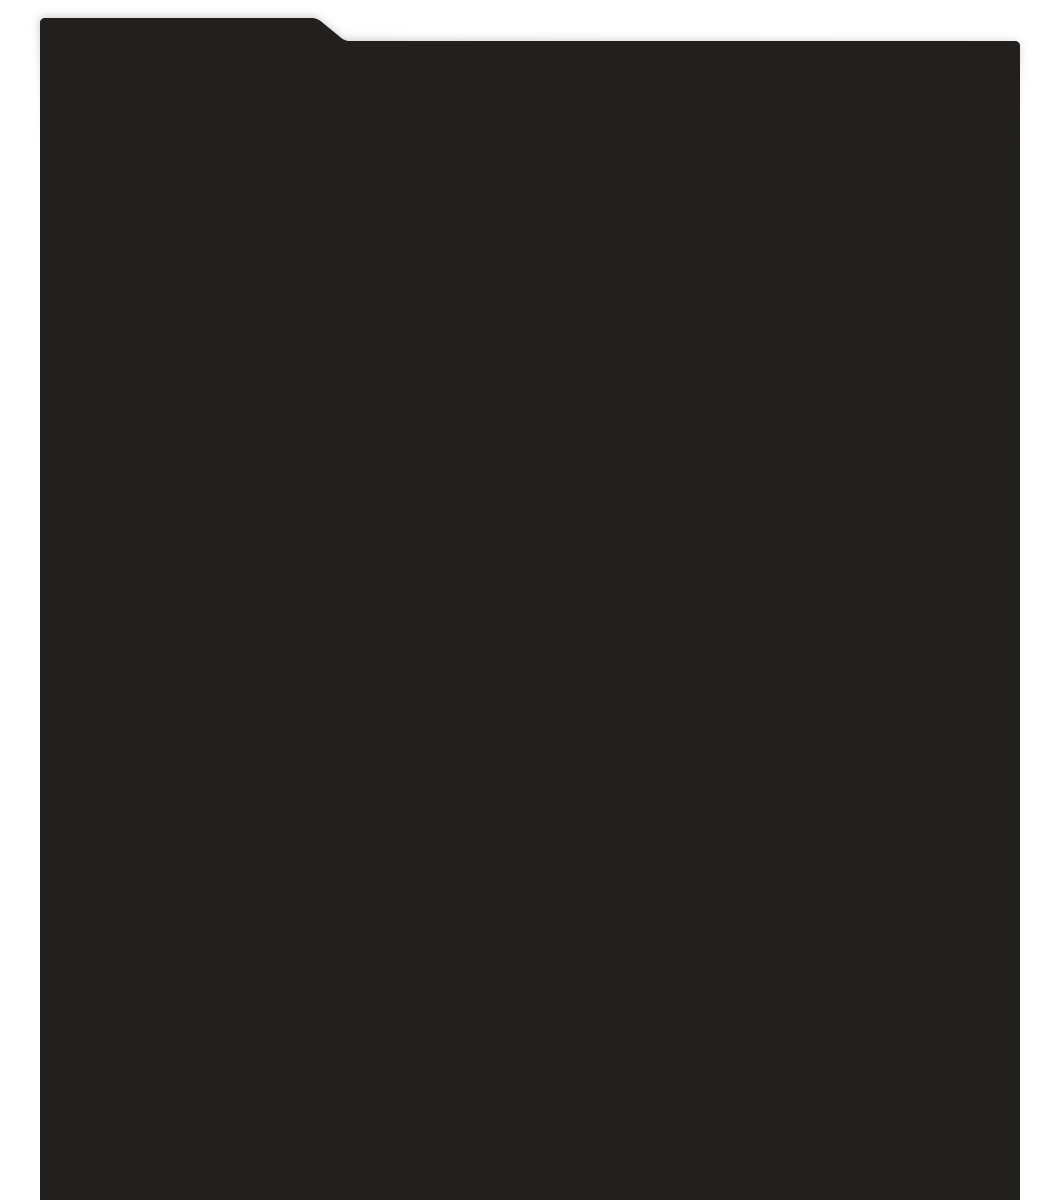
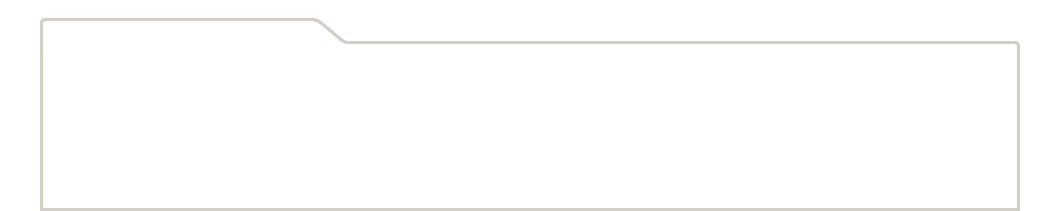
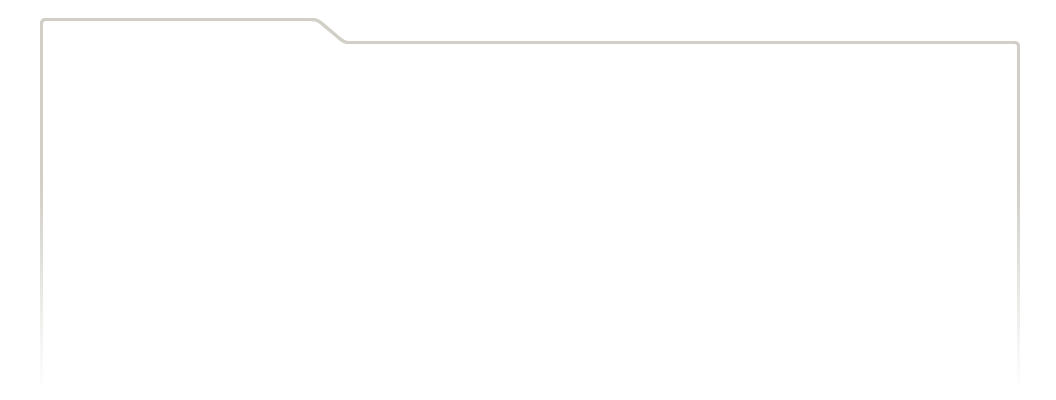
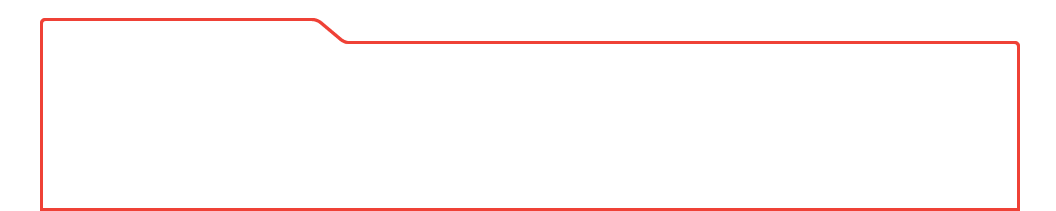
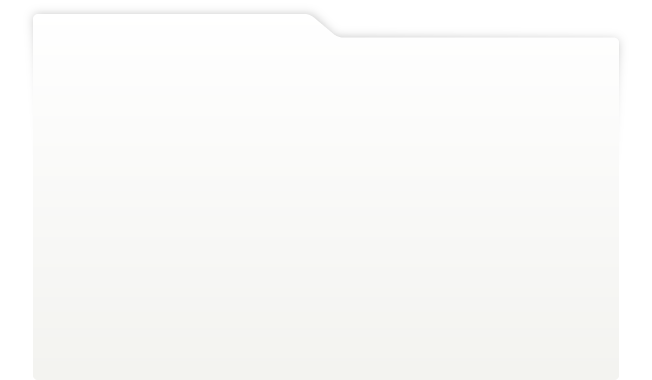
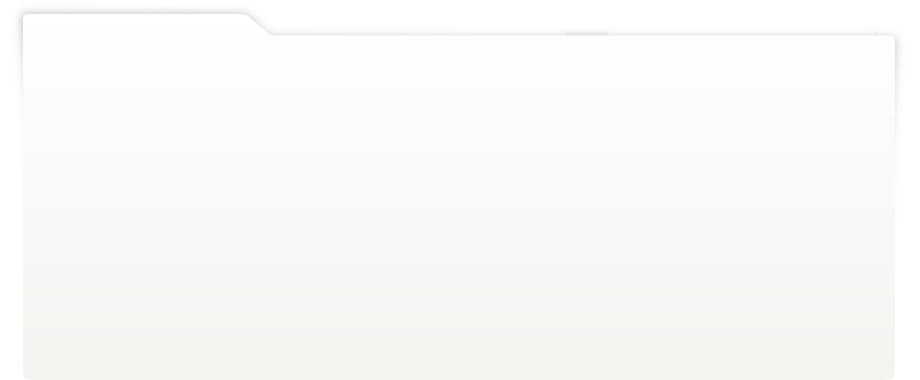
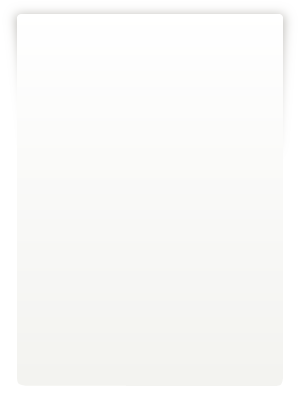
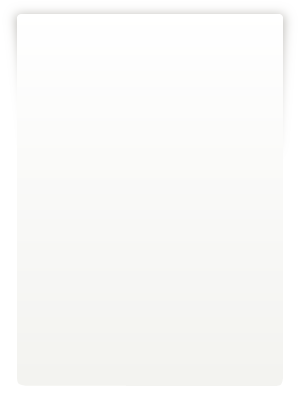
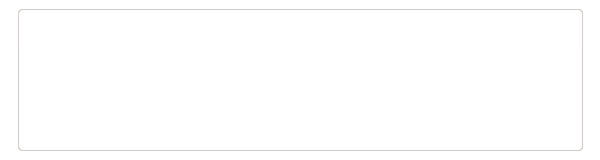
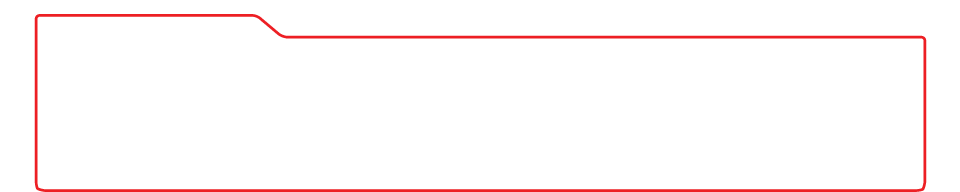
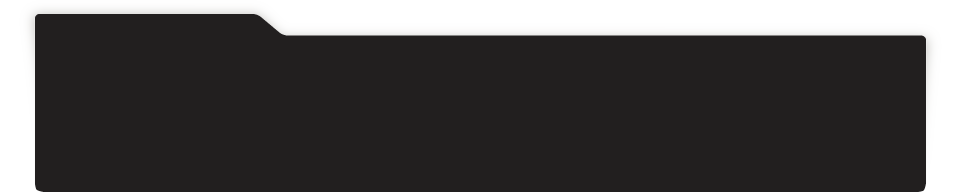
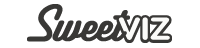
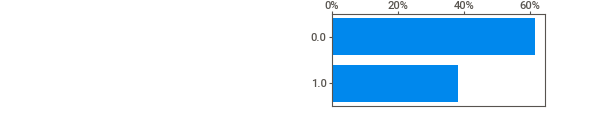
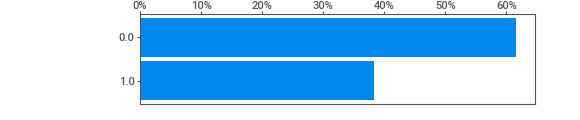
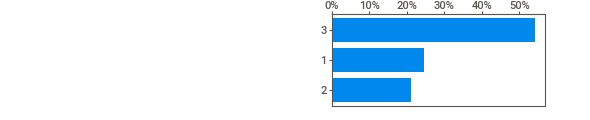
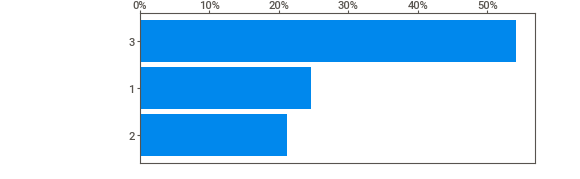
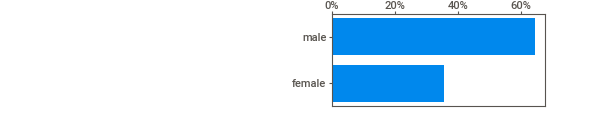
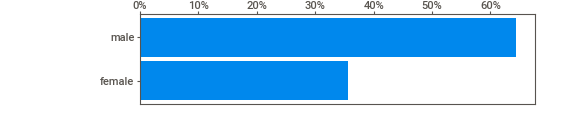
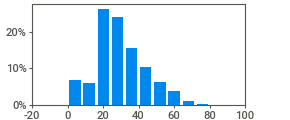
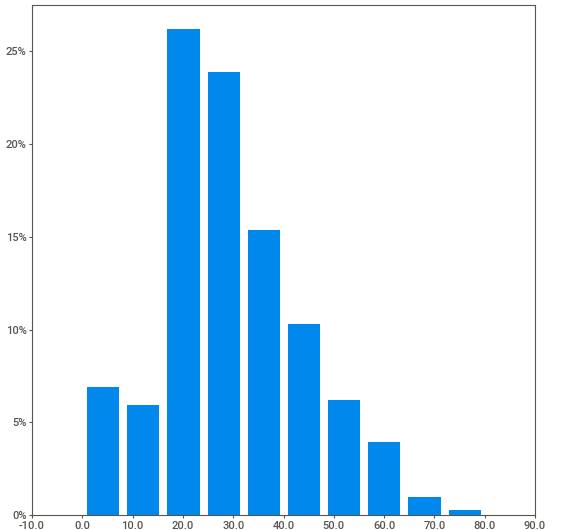
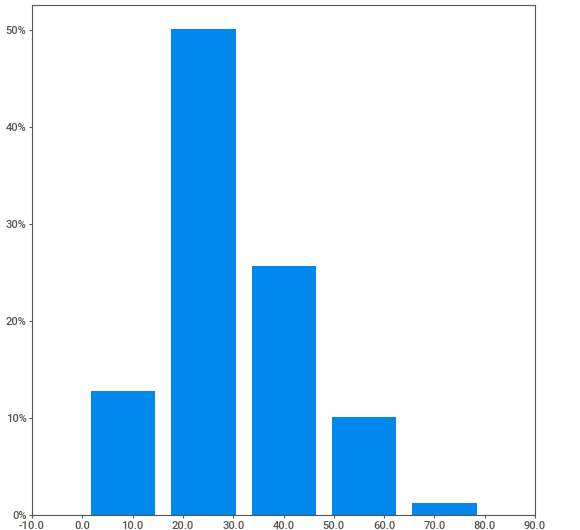
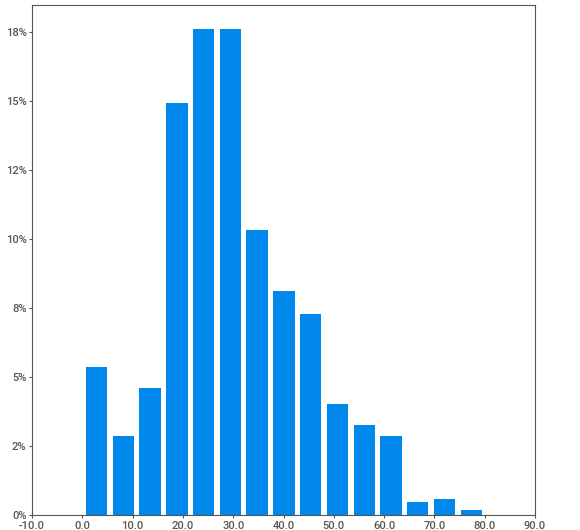
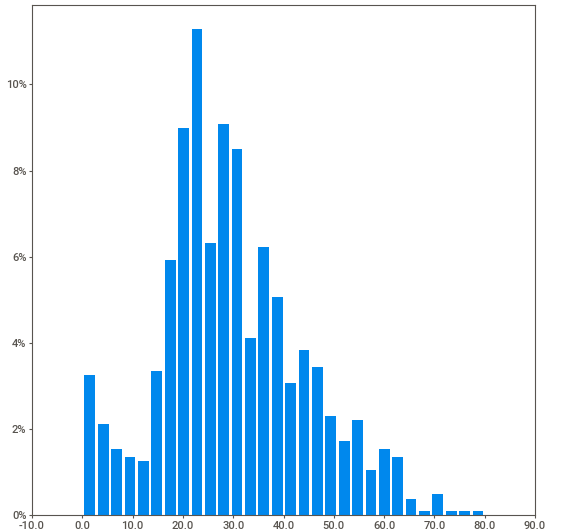
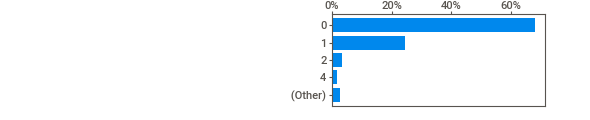
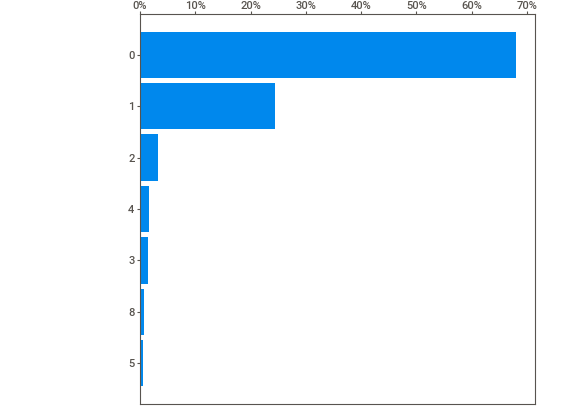
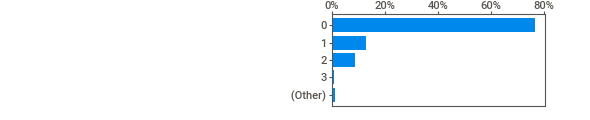
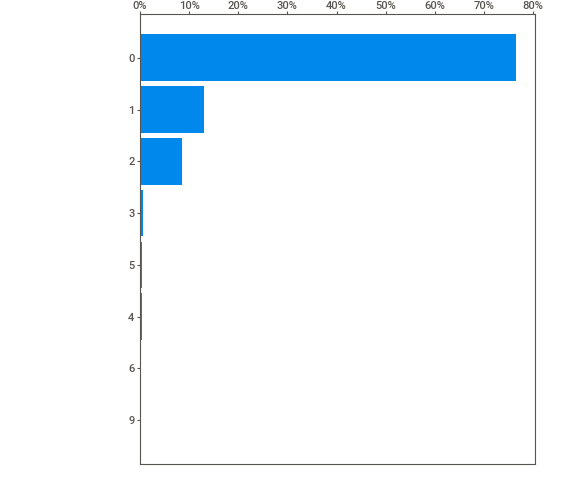
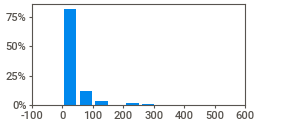
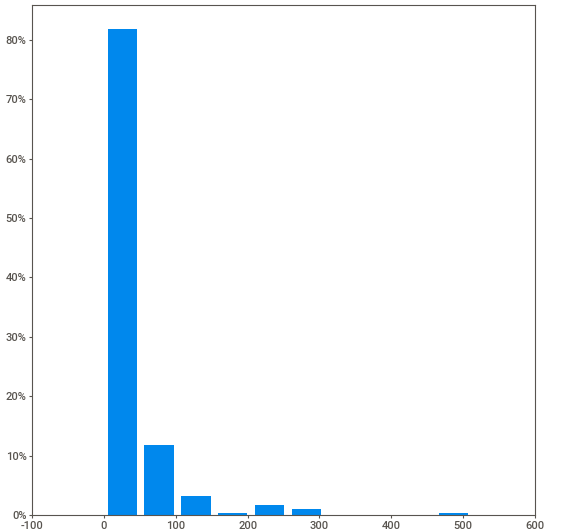
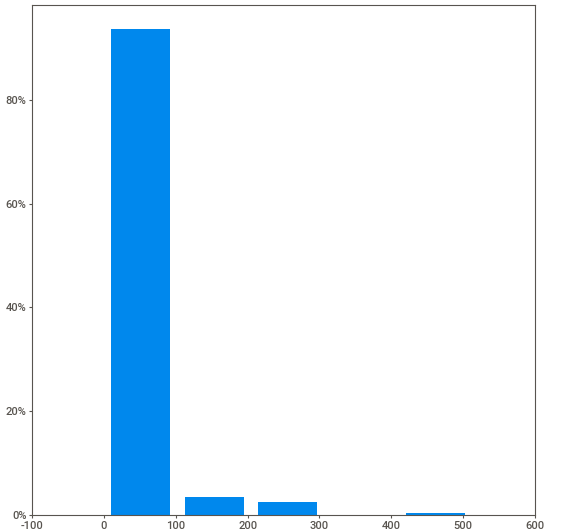
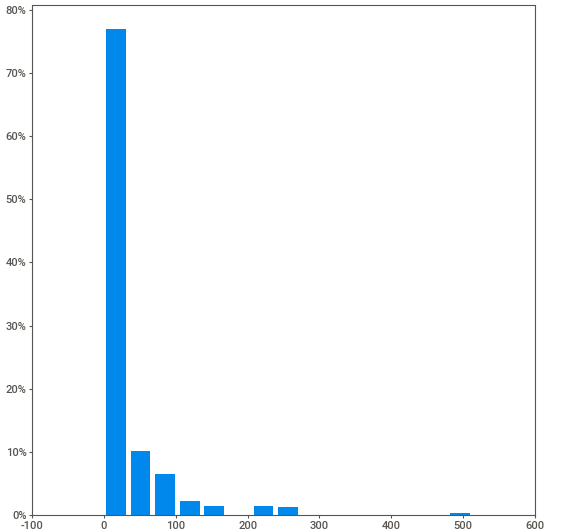
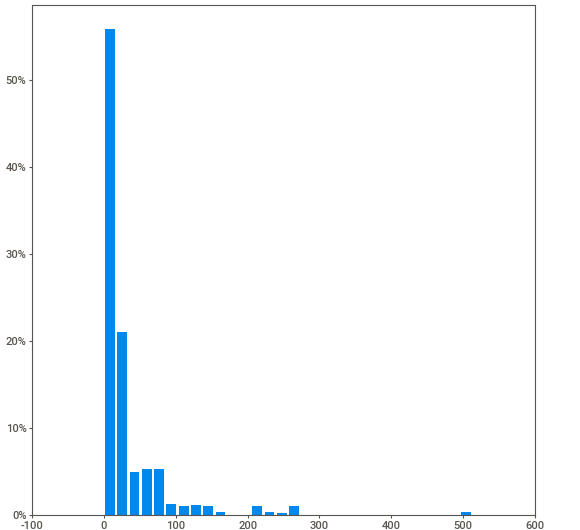
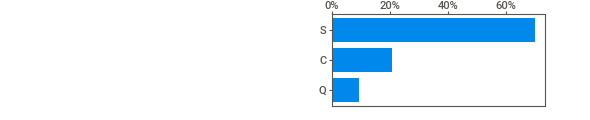
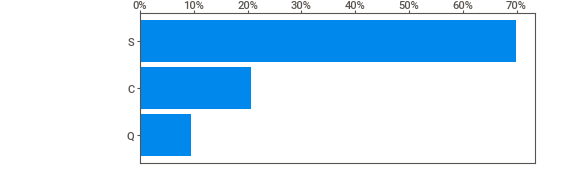
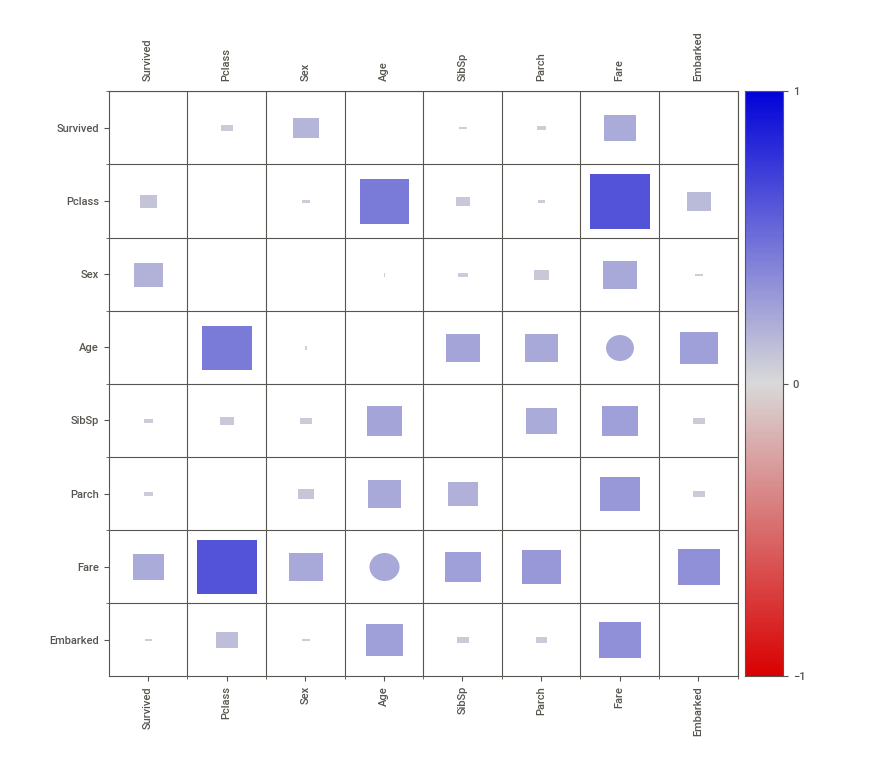
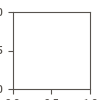

In [ ]:
report = sweetviz.analyze(data)
report.show_notebook()

In [ ]:
data.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
def filling(df , cols):
  for col in cols:
    col_mean = df[col].mean()
    df[col] = df[col].fillna(col_mean)


def fill_object(df , cols):
  for col in cols:
    df[col] = df[col].fillna(method='bfill')

In [ ]:
filling(data,cols=['Age','Survived','Fare'])
fill_object(data,cols=['Cabin','Embarked'])

In [ ]:
encoder = LabelEncoder()
columns = ['Embarked','Sex','Cabin']
for col in columns:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
for col in data.columns:
  print(col,'-->',data[col].max(),'\n')

Survived --> 1.0 

Pclass --> 3 

Sex --> 1 

Age --> 80.0 

SibSp --> 8 

Parch --> 9 

Fare --> 512.3292 

Cabin --> 185 

Embarked --> 2 



In [ ]:
for col in data.columns:
  print(col,'-->',data[col].min(),'\n')

Survived --> 0.0 

Pclass --> 1 

Sex --> 0 

Age --> 0.17 

SibSp --> 0 

Parch --> 0 

Fare --> 0.0 

Cabin --> 0 

Embarked --> 0 



In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,1,22.0,1,0,7.2500,106,2
1,1.0,1,0,38.0,1,0,71.2833,106,0
2,1.0,3,0,26.0,0,0,7.9250,70,2
3,1.0,1,0,35.0,1,0,53.1000,70,2
4,0.0,3,1,35.0,0,0,8.0500,163,2


In [ ]:
data['Survived'] = data['Survived'].astype(np.int64)

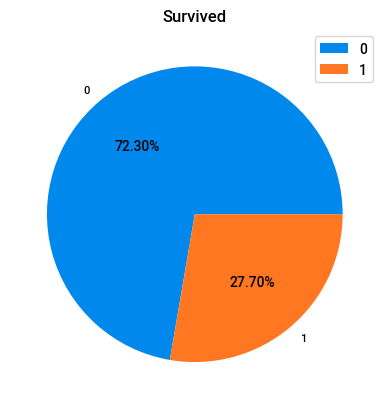

In [ ]:
plt.pie(x = data['Survived'].value_counts(), labels = data['Survived'].unique(), autopct = '%1.2f%%');plt.title('Survived')
plt.legend()

<Axes: >

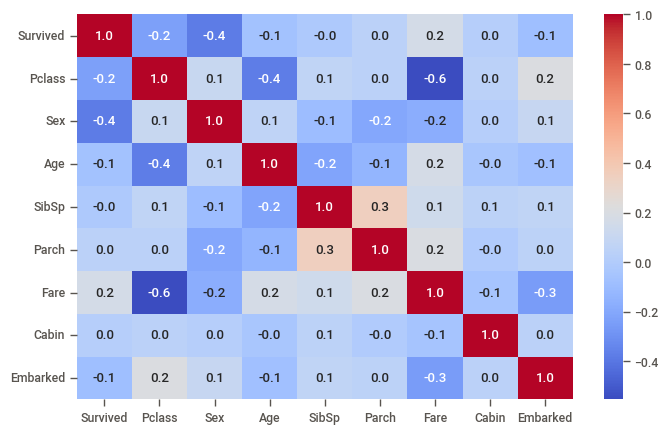

In [ ]:
plt.figure(figsize=(8,5))
sns.set_context('paper',font_scale=1)
sns.heatmap(df.corr(),annot=True,fmt=".1f",cmap="coolwarm")

<Axes: >

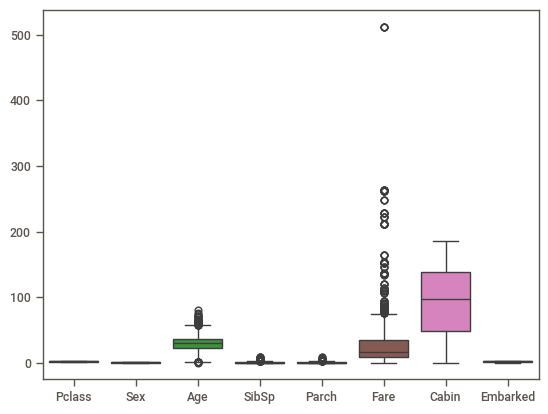

In [ ]:
sns.boxplot(data.iloc[:,1:])

In [42]:
featurers = ['Fare','Age']
q1 = data[featurers].quantile(0.25)
q3 = data[featurers].quantile(0.75)
IQR = q3 - q1
th_1 = q1 - (1.5 * IQR)
th_2 = q3 + (1.5 * IQR)

In [43]:
data = data[~((data[featurers] < (th_1)) |(data[featurers] > (th_2))).any(axis=1)]

<Axes: >

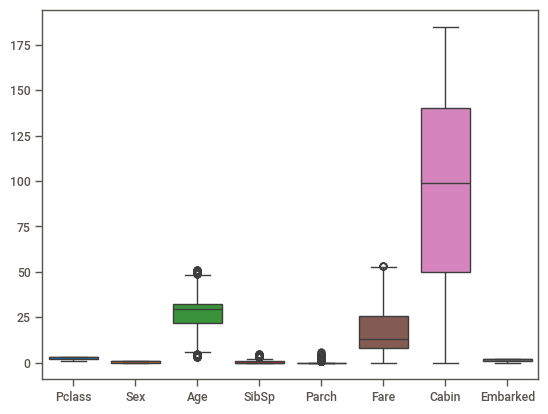

In [44]:
sns.boxplot(data.iloc[:,1:])

## Modeling

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,106,2
1,1,1,0,38.0,1,0,71.2833,106,0
2,1,3,0,26.0,0,0,7.9250,70,2
3,1,1,0,35.0,1,0,53.1000,70,2
4,0,3,1,35.0,0,0,8.0500,163,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 412
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  979 non-null    int64  
 1   Pclass    979 non-null    int64  
 2   Sex       979 non-null    int64  
 3   Age       979 non-null    int64  
 4   SibSp     979 non-null    int64  
 5   Parch     979 non-null    int64  
 6   Fare      979 non-null    float64
 7   Cabin     979 non-null    int64  
 8   Embarked  979 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 76.5 KB


In [ ]:
data['Age'] = data['Age'].astype('int64')

In [ ]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [ ]:
model = XGBClassifier(n_estimators=500,n_jobs=-1)

In [ ]:
model.fit(X_train,y_train);

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred , y_true = y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       150
           1       0.45      0.48      0.46        46

    accuracy                           0.74       196
   macro avg       0.64      0.65      0.65       196
weighted avg       0.75      0.74      0.74       196



In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']